# Introduction to scikit-learn classification for single cell data

## 1. Let's start by installing all required libraries

In [69]:
!pip install numpy scikit_learn matplotlib seaborn pandas tifffile -q

## 2. Loading a data set
---
For loading the dataset we will be using a library called [pandas](https://pandas.pydata.org/).
This libraries allows the loading of multiple file formats for tabular data, including .xls, .xlsx, .csv and many more.
We will be using the [read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) method to load the data.
```python
import pandas as pd

data = pd.read_csv("path/to/data")
```

Let's use it to load the morphological_measurements.csv in the data folder of this repository.

In [1]:
# your code here
import pandas as pd
data = pd.read_csv('../data/morphological_measurements.csv')

## 3. Take a look at the data

pandas provides several easy ways to visualize the data.
you can just print the dataframe to take a look at it:
```python
print(data)
```
or since we are using jupyter lab we can just execute a cell with the variable name

In [2]:
# your code here
data

,Cell ID,Area,Perimeter,Length,Width,Eccentricity,Irregularity,Cell Cycle Phase
0,1,182,57,16.000000,13.000000,0.582961,4.225121,1
1,2,211,64,16.552945,15.231546,0.391516,4.405942,1
2,3,237,67,18.027756,14.866069,0.565685,4.352118,1
3,4,227,66,17.000000,16.000000,0.337915,4.380574,1
4,5,204,60,15.000000,15.000000,0.000000,4.200840,1
...,...,...,...,...,...,...,...,...
529,448,389,85,24.351591,20.248457,0.555518,4.309671,1
530,449,420,87,23.000000,21.000000,0.407862,4.245165,2
531,452,450,91,25.961510,20.615528,0.607813,4.289781,3
532,453,424,89,25.495098,21.213203,0.554700,4.322222,3


if you want to take a look at just the columns names and first few rows you can do so by:
```python
data.head(n_rows) # default value is 5
```

In [3]:
# your code here
data.head(10)

,Cell ID,Area,Perimeter,Length,Width,Eccentricity,Irregularity,Cell Cycle Phase
0,1,182,57,16.000000,13.000000,0.582961,4.225121,1
1,2,211,64,16.552945,15.231546,0.391516,4.405942,1
2,3,237,67,18.027756,14.866069,0.565685,4.352118,1
3,4,227,66,17.000000,16.000000,0.337915,4.380574,1
4,5,204,60,15.000000,15.000000,0.000000,4.200840,1
5,6,217,66,17.204651,15.000000,0.489760,4.480372,1
6,7,239,66,18.027756,16.155494,0.443760,4.269185,1
7,8,239,66,17.691806,15.556349,0.476274,4.269185,1
8,9,263,69,20.615528,16.401219,0.605854,4.254722,2
9,10,263,72,18.027756,17.088007,0.318651,4.439710,1


pandas also contains an amazing integration of matplotlib plots.
To plot data we can simply do:
```python
data.plot() # plots all columns
data[["column_name_1", "column_name_2"]].plot() # plots just the defined columns
data["column_name_1"].hist() # creates an histogram of column_name_1
```

Try to plot all the data:


<Axes: >

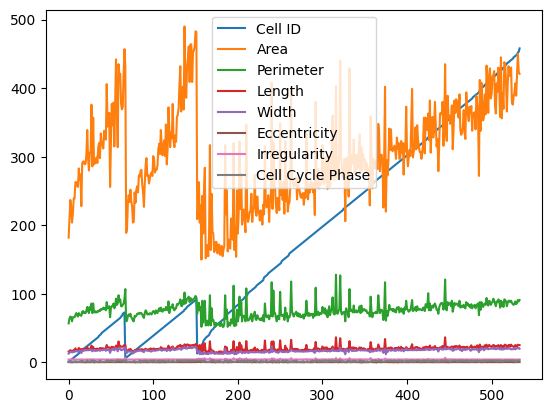

In [4]:
# your code here
data.plot()

plot just the area and perimeter:

<Axes: >

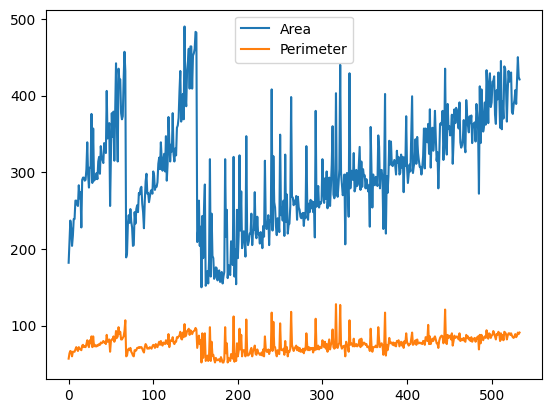

In [8]:
# your code here
data[["Area", "Perimeter"]].plot()

create an histogram of cell cycle phases

<Axes: >

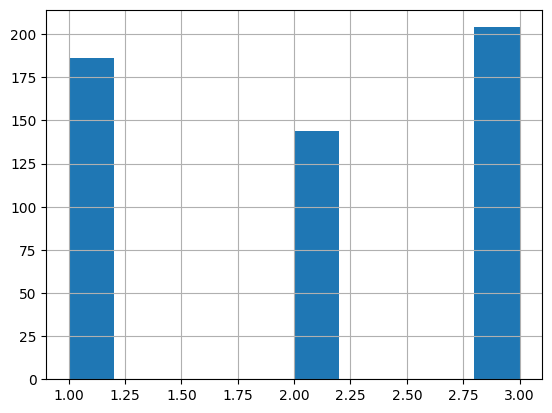

In [9]:
# your code here
data['Cell Cycle Phase'].hist()

## 4. Using a machine learning classifier to automatically classify the cell cycle phase of S. aureus cells

S. aureus cells can be classified in three different phases:
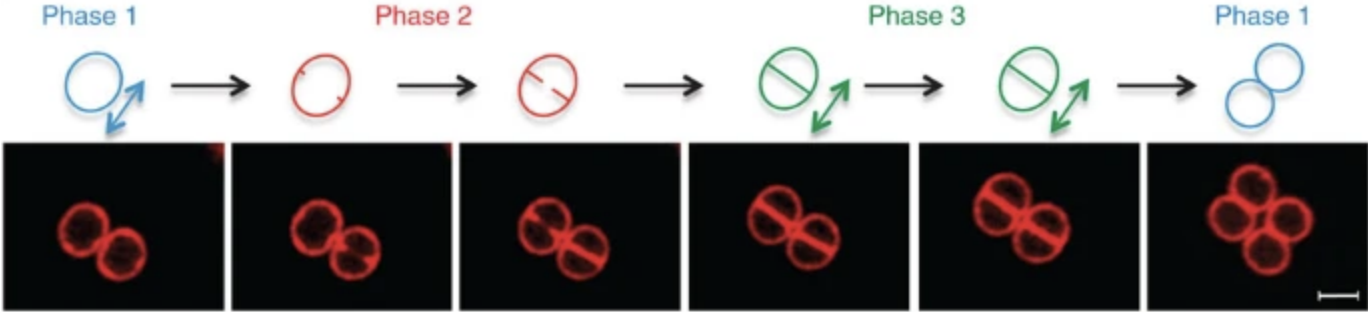

Phase 1 cells start more roundish and as they go over their cell cycle they will start to elongate and increase in size.

---

The dataset we have just loaded contains a column of manually annotated cell cycle phases.  
Let's try to build a classifier capable of automatically classifying cells based on their morphological measurements

---

BUT FIRST, we need to preprocess our data.  
As we did for intensity values we need to normalize all the values to make sure they are in similar range.

For this we are going to build our own custom function that normalizes all values (except the cell cycle classification) to mean 0 and standard deviation of 1 (also known as the Z-scores).
This can be achieved by subtracting to each value the mean and then dividing by the standard deviation.
```python
data["column_name"] = (data["column_name"] - data["column_name"].mean()) / data["column_name"].std()
```

In [13]:
# your code here
def normalize_column(data_column):

    mean = data_column.mean()

    std = data_column.std()

    normalized_column = (data_column - mean) / std

    return normalized_column

Let's create a copy of our dataset and use the newly created function to normalized all columns besides Cell Cycle Phase.

You can copy it by:
```python
normalized_data = data.copy()
```

Columns list: ['Area', 'Perimeter', 'Length', 'Width', 'Eccentricity','Irregularity']

In [14]:
# your code here
normalized_data = data.copy()
cols = ['Area', 'Perimeter', 'Length', 'Width', 'Eccentricity','Irregularity']

for col in cols:
    normalized_data[col] = normalize_column(data[col])

Try plotting the some of those columns to see how it changed

<Axes: >

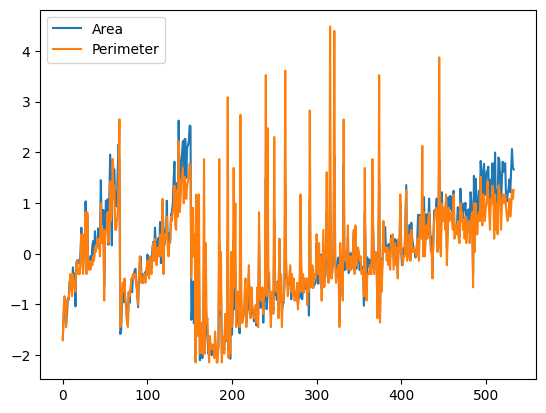

In [16]:
# your code here
normalized_data[["Area", "Perimeter"]].plot()

In [74]:
from sklearn.preprocessing import StandardScaler # TODO change to custom function

rows, columns = data.shape

## shuffle data
data = data.sample(frac=1,replace=False,random_state=0).reset_index(drop=True)

## standardize variables
cols = ['Area', 'Perimeter', 'Length', 'Width', 'Eccentricity','Irregularity']

for col in cols:
  scaler = StandardScaler()
  data[col+"_scaled"] = scaler.fit_transform(data[[col]])

## split into train, test
train = data.loc[0:int(rows*0.8), :].copy() #separates 80% of data as training data
test = data.loc[int(rows*0.8):, :].copy() #separates 20% of data as validation data

In [75]:
from sklearn.linear_model import LogisticRegression

x_cols = ['Area', 'Perimeter', 'Length', 'Width', 'Eccentricity','Irregularity']
y_col = 'Cell Cycle Phase'

# fit on training set
clf = LogisticRegression().fit(train[x_cols],train[y_col])

# predictions on test set
preds = clf.predict(test[x_cols])
# accuracy on test set
sum(preds==test[y_col])/test.shape[0]

/Users/bsaraiva/mambaforge/envs/bioimagecourse/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.514018691588785

In [76]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

conf_mat = confusion_matrix(test[y_col],preds,normalize='true')
conf_mat

array([[0.7       , 0.075     , 0.225     ],
       [0.29411765, 0.11764706, 0.58823529],
       [0.27272727, 0.03030303, 0.6969697 ]])

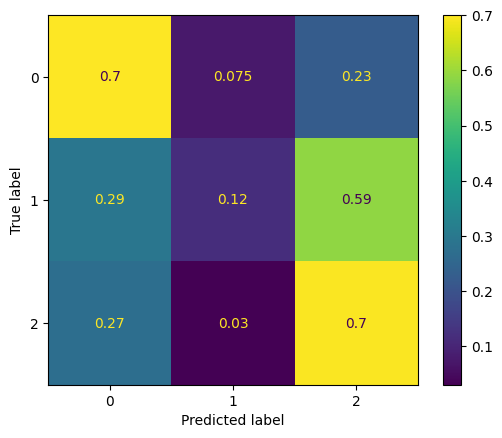

In [77]:
ConfusionMatrixDisplay(confusion_matrix=conf_mat).plot()

## Could this crappy model be explained by class inbalance?

We have 147 cells in phase 1, 110 cells in phase 2 and 171 cells in phase 3


<Axes: >

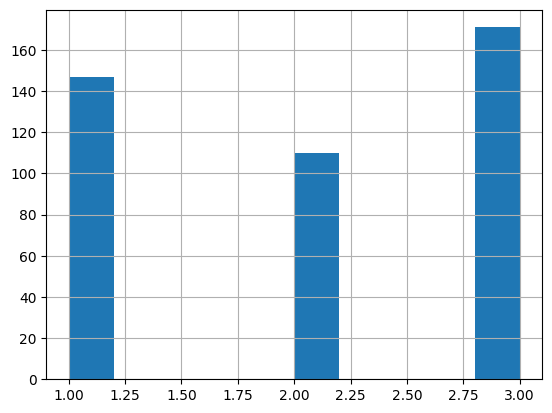

In [78]:
p1, p2, p3 = train[train['Cell Cycle Phase']==1].shape[0], train[train['Cell Cycle Phase']==2].shape[0], train[train['Cell Cycle Phase']==3].shape[0]
print(f"We have {p1} cells in phase 1, {p2} cells in phase 2 and {p3} cells in phase 3")
train['Cell Cycle Phase'].hist()

## We need to balance our classes, we can start by trying to oversample the minority classes

<Axes: >

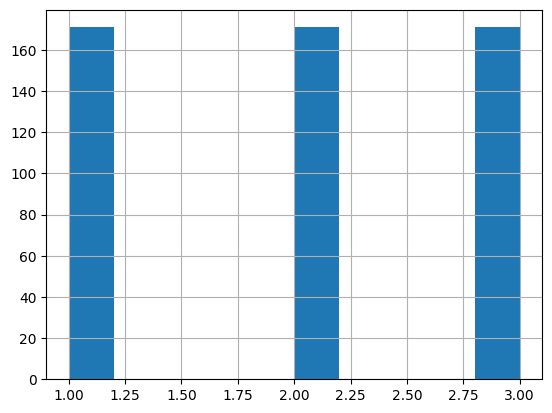

In [79]:
train_oversampled = pd.concat([train,train[train['Cell Cycle Phase']==2].sample(n=p3-p2,replace=True) ]).reset_index(drop=True)
train_oversampled = pd.concat([train_oversampled,train[train['Cell Cycle Phase']==1].sample(n=p3-p1,replace=True) ]).reset_index(drop=True)
train_oversampled['Cell Cycle Phase'].hist()

## Let's try again training the classifier and see if it improved

array([[0.45      , 0.5       , 0.05      ],
       [0.26470588, 0.41176471, 0.32352941],
       [0.12121212, 0.21212121, 0.66666667]])

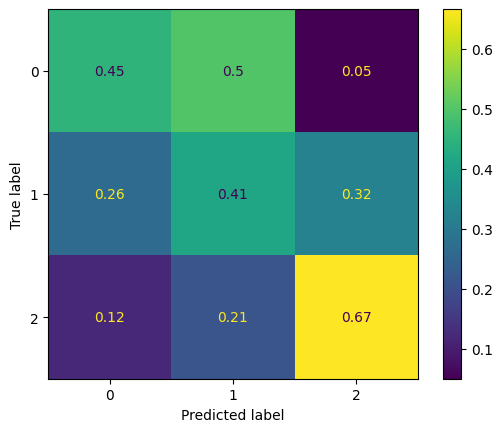

In [80]:
from sklearn.linear_model import LogisticRegression

x_cols = [col+'_scaled' for col in cols]
y_col = 'Cell Cycle Phase'

# fit on training set
clf = LogisticRegression().fit(train_oversampled[x_cols],train_oversampled[y_col])

# predictions on test set
preds = clf.predict(test[x_cols])

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

conf_mat = confusion_matrix(test[y_col],preds,normalize='true')
ConfusionMatrixDisplay(confusion_matrix=conf_mat).plot()
conf_mat

## Better but still not great, let's try other classifiers
### Thankfully, all classifiers in `sklearn` obey the same API, ie, they all have the methods:

* `fit()`
* `predict()`
* `predict_proba()`

## but wait, as we tweak our model or testing different models, if we keep testing against the test set, we incur in **data leakage**. that is, we are inplicily fitting against the test set. This is not good


We have a few options:
* we can make many train/test splits (**BAD**)
* we can bootstrap our training set, always testing against the same test set (Also **BAD**)
* OR you can do cross-validation (better)

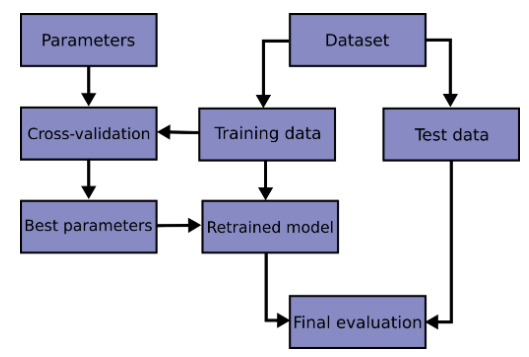
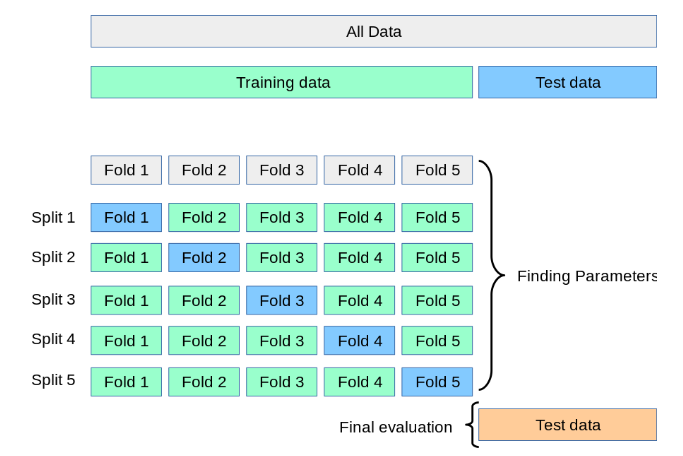

https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [81]:
from sklearn.model_selection import ShuffleSplit,cross_val_score
import numpy as np

clf = LogisticRegression()
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=1)
scores = cross_val_score(clf, train_oversampled[x_cols], train_oversampled['Cell Cycle Phase'], cv=cv,scoring='accuracy')

print(scores)
print("cross-validated mean and standard deviation:", np.mean(scores),np.std(scores))


[0.61165049 0.53398058 0.50485437 0.57281553 0.47572816]
cross-validated mean and standard deviation: 0.5398058252427184 0.04819290736307126


## Now that we have our cross-validation working, let's try it to train different classifiers

In [82]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

names = [
    "Logistic Regression",
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025,probability=True),
    SVC(gamma=2, C=1,probability=True),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

results = []

for name,clf in zip(names,classifiers):
    print(name)

    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=1)
    scores = cross_val_score(clf, train_oversampled[x_cols], train_oversampled['Cell Cycle Phase'], cv=cv,scoring='accuracy')
    print(np.mean(scores))
    results.append({"model":name,"train_acc_mean":np.mean(scores),"train_acc_std":np.std(scores)})

results_df= pd.DataFrame(results)

Logistic Regression
0.5398058252427184
Nearest Neighbors
0.5533980582524272
Linear SVM
0.5184466019417476
RBF SVM
0.5514563106796115
Gaussian Process
0.5456310679611651
Decision Tree
0.5339805825242718
Random Forest
0.5883495145631068
Neural Net
0.520388349514563
AdaBoost
0.5456310679611651
Naive Bayes
0.5398058252427184
QDA


/Users/bsaraiva/mambaforge/envs/bioimagecourse/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/bsaraiva/mambaforge/envs/bioimagecourse/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/bsaraiva/mambaforge/envs/bioimagecourse/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/bsaraiva/mambaforge/envs/bioimagecourse/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the 

0.5048543689320388


### Let's plot our models accuracies

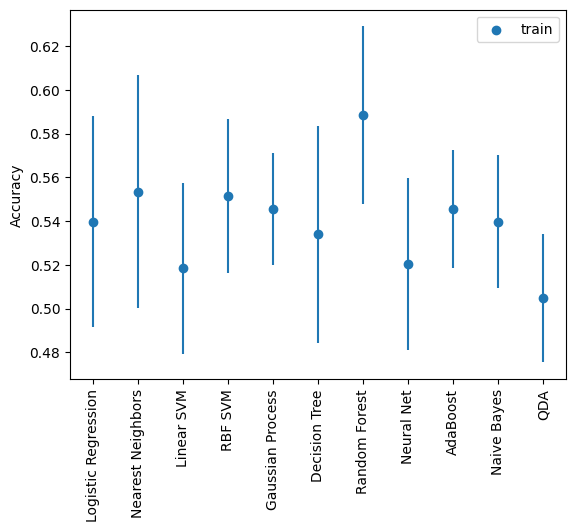

In [83]:
from matplotlib import pyplot as plt
plt.scatter(results_df['model'],results_df['train_acc_mean'],label='train');
plt.vlines(results_df['model'],results_df['train_acc_mean']-results_df['train_acc_std'],results_df['train_acc_mean']+results_df['train_acc_std'])
# plt.scatter(results_df['model'],results_df['test_auc'],label='test');
plt.xticks(rotation=90);
plt.ylabel("Accuracy")
plt.legend();

## Let's try to fine tune one of the better performing models (Random Forest)
### https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
### Random Forest Classifier accepts several parameters, including the number of trees in the forest, the number of features to consider when looking for the best split, and the maximum depth of the trees.
### Let's use the GridSearchCV function to find the best parameters for our mode

In [84]:
from sklearn.model_selection import GridSearchCV

depth_values = [1, 5, 10, 15, 20]
estimators_values = [10, 50, 100, 150, 200]
features_values = [1, 2, 3, 4, 5]

rfc = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=1)
parameters = {
    "max_depth": depth_values,
    "n_estimators": estimators_values,
    "max_features": features_values
}
classifier = GridSearchCV(rfc, parameters, cv=cv, scoring="accuracy")
classifier.fit(train_oversampled[x_cols],train_oversampled[y_col])
print(classifier.best_params_)
print(np.max(classifier.cv_results_['mean_test_score']))


{'max_depth': 20, 'max_features': 3, 'n_estimators': 150}
0.6621359223300971


## Try to further fine tune the model or try a different model

In [85]:
# your code here